In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [ ]:
df=pd.read_csv("/content/internet_service_churn.csv")

In [ ]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


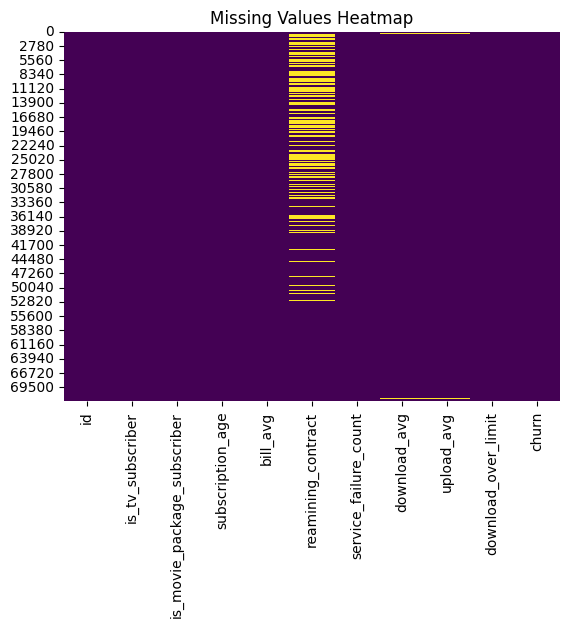

In [ ]:

missing_indicator = df.isnull()
sns.heatmap(missing_indicator, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:

mean_r = df['reamining_contract'].mean()
mean_d = df['download_avg'].mean()
mean_a = df['upload_avg'].mean()
# Fill missing values with the mean
df['reamining_contract'].fillna(mean_r, inplace=True)
df['download_avg'].fillna(mean_d, inplace=True)
df['upload_avg'].fillna(mean_a, inplace=True)
print(df.isnull().sum())

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


<ipython-input-10-944ea9cbb93d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reamining_contract'].fillna(mean_r, inplace=True)
<ipython-input-10-944ea9cbb93d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


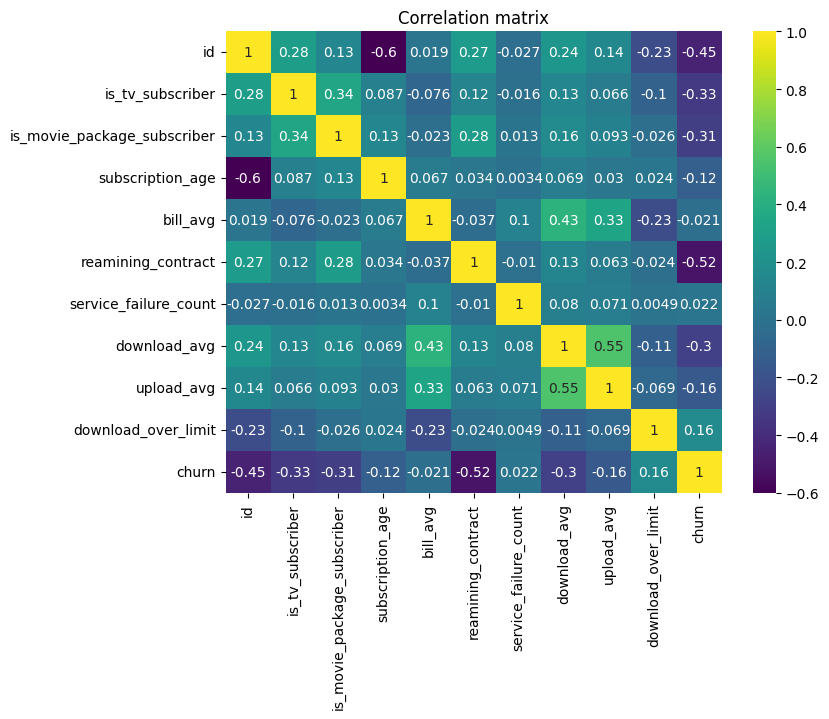

In [ ]:

plt.figure(figsize=(8, 6))
corr=df.corr()
sns.heatmap(corr, annot=True,cmap='viridis')
plt.title("Correlation matrix")
plt.show()

In [ ]:
X = df.drop(columns=['churn', 'id'])
y = df['churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Logistic Regression** is used for binary classification, it has low computation cost,it's used for classification problems where the dependent variable is categorical.The logistic regression model uses the logistic function (or sigmoid function) to map the input variables to the output probability. The logistic function ensures that the predicted probabilities range between 0 and 1, which is essential for binary classification.The decision boundary is used  for determining the classification.

**Random Forest:**it capture non-linear relationships between features, relies and provides feature importance, which helps in understanding which variables are most influential in predicting churn. It’s robust to overfitting due to its ensemble nature

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
#logistic regression
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*log_reg_metrics))
print(" ")
# Random Forest Evaluation
rf_metrics = evaluate_model(y_test, y_pred_rf)
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*rf_metrics))
print(" ")
# ROC-AUC Score
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])
print("Logistic Regression - ROC AUC: {:.4f}".format(roc_auc_log_reg))
print(" ")
print("Random Forest - ROC AUC: {:.4f}".format(roc_auc_rf))

Logistic Regression - Accuracy: 0.8178, Precision: 0.8116, Recall: 0.8684, F1-Score: 0.8390
 
Random Forest - Accuracy: 0.9423, Precision: 0.9544, Recall: 0.9394, F1-Score: 0.9468
 
Logistic Regression - ROC AUC: 0.8913
 
Random Forest - ROC AUC: 0.9811


Random Forest has a significantly higher accuracy,it correctly predicted the target (churn) for a larger portion of the test data compared to Logistic Regression.

Precision represents the positive predictions (churn) that were correct. Random Forest shows higher precision, with fewer false-positive predictions than Logistic Regression.

Recall is the ability to capture actual churn cases. Random Forest also outperforms Logistic Regression.

The F1-score is a balance between precision and recall. Random Forest achieves a much higher F1-score,  it strikes a better balance between correct prdeiction and avoiding false positives.

**Comparision**

Random Forest performed better across all evaluation metrics (accuracy, precision, recall, and F1-score). The reason for  superior performance is Random Forest’s ability to capture complex, non-linear relationships and handle feature interactions effectively through its ensemble of decision trees. Random Forest is less prone to overfitting.

While Logistic Regression provided reasonable results and can be useful as a baseline model, its linear nature limits its ability to capture more intricate patterns in the data.

**REPORT:**

The goal of this analysis was to predict customer churn using machine learning models. The dataset used was "Internet Service Provider Churn" dataset, we applied necessary preprocessing, and evaluated two models: Logistic Regression and Random Forest, with performance metrics.

1. Data Preprocessing

Handling Missing Values: Missing values were identified and appropriately handled (imputation or removal).

Feature Scaling: Continuous variables (e.g., "MonthlyCharges," "Tenure") were scaled using StandardScaler to standardize the data for models sensitive to scaling, such as Logistic Regression.

2. Model Selection

Logistic Regression:  It assumes a linear relationship between features and the log-odds of the target variable.
Random Forest: Selected for its ability to capture complex, non-linear relationships and feature interactions,ensemble nature also makes it robust to overfitting.
3. Training and Evaluation
Both models were trained on the preprocessed dataset, and their performance was evaluated using four key metrics: Accuracy, Precision, Recall, and F1-Score.

**Evaluation Results:**

Random Forest outperformed Logistic Regression across all metrics, demonstrating better generalization, higher precision, and greater recall, making it the more effective model for this task.


4. Conclusion

Random Forest emerged as the better model due to its higher performance on all evaluation metrics. Its ability to capture complex relationships between features and its robustness against overfitting made it the ideal choice for customer churn prediction in this dataset.
Logistic Regression, while not as powerful, provided a useful baseline and was more interpretable, making it easier to explain to stakeholders.

5. Potential Improvements

Hyperparameter tuning of the Random Forest model could further improve performance.

Feature selection methods could help eliminate redundant or irrelevant features, improving model efficiency and possibly accuracy.











